# Car Price Prediction

### Importing Dependencies

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection and Processing

In [2]:
# loading the data as pandas dataframe
dirname = os.path.dirname("__file__")
filename = os.path.join(dirname, 'Datasets/car_data.csv')
df = pd.read_csv(filename)

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns

df.shape

(301, 9)

In [5]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number if missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distrubution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the categorical data

In [8]:
# Encoding the "Fuel_Type" Column
df.replace({'Fuel_Type':{"Petrol":0,"Diesel":1,"CNG":2}}, inplace=True)

# Encoding the "Seller_Type" Column
df.replace({'Seller_Type':{"Dealer":0,"Individual":1}}, inplace=True)

# Encoding the "Transmission" Column
df.replace({'Transmission':{"Manual":0,"Automatic":1}}, inplace=True)

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splititng the data into training and test

In [9]:
data = df.drop(["Selling_Price", "Car_Name"], axis=1)
label = df.Selling_Price

In [10]:
# splititng trainig and test data
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.1, random_state=2)

In [11]:
# viewing the dimensions of train and test data
print(data.shape, data_train.shape, data_test.shape)

(301, 7) (270, 7) (31, 7)


### Model Training
#### 1.Linear Regression

In [12]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(data_train, label_train)

LinearRegression()

#### Model Evaluation

In [14]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(data_train)

In [15]:
# R squared error
r2_error = metrics.r2_score(label_train, training_data_prediction)
print("R squared Error: ", r2_error)

R squared Error:  0.8799451660493698


In [16]:
# Mean Absolute Error
ma_error = metrics.mean_absolute_error(label_train, training_data_prediction)
print("Mean Absolute Error: ", ma_error)

Mean Absolute Error:  1.2166174093912014


#### Visualize Actual Prices vs Predicted Prices for training data

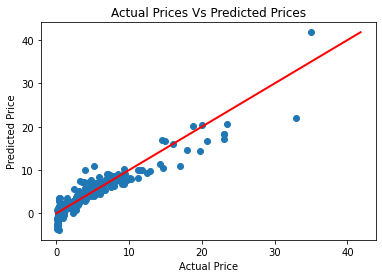

In [42]:
plt.scatter(label_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

max_value = max([*label_train, *training_data_prediction])

plt.plot([0,max_value],[0,max_value], 'red', linewidth=2)

plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [36]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(data_test)

In [37]:
# R squared error
r2_error = metrics.r2_score(label_test, test_data_prediction)
print("R squared Error: ", r2_error)

R squared Error:  0.8365766715026905


In [38]:
# Mean Absolute Error
ma_error = metrics.mean_absolute_error(label_test, test_data_prediction)
print("Mean Absolute Error: ", ma_error)

Mean Absolute Error:  1.1516382156614553


#### Visualize Actual Prices vs Predicted Prices for test data

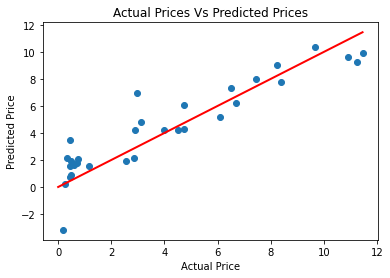

In [41]:
plt.scatter(label_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
max_value = max([*label_test, *test_data_prediction])

plt.plot([0,max_value],[0,max_value], 'red', linewidth=2)

plt.title("Actual Prices Vs Predicted Prices")
plt.show()

#### 2.Lasso Regression

In [54]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [55]:
lass_reg_model.fit(data_train, label_train)

Lasso()

#### Model Evaluation

In [56]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(data_train)

In [57]:
# R squared error
r2_error = metrics.r2_score(label_train, training_data_prediction)
print("R squared Error: ", r2_error)

R squared Error:  0.8427856123435794


In [58]:
# Mean Absolute Error
ma_error = metrics.mean_absolute_error(label_train, training_data_prediction)
print("Mean Absolute Error: ", ma_error)

Mean Absolute Error:  1.2863097696916528


#### Visualize Actual Prices vs Predicted Prices for training data


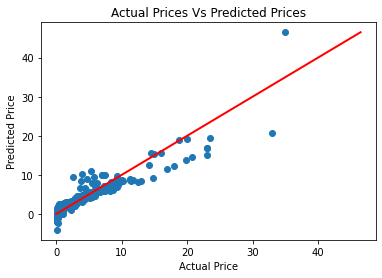

In [59]:
plt.scatter(label_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

max_value = max([*label_train, *training_data_prediction])

plt.plot([0,max_value],[0,max_value], 'red', linewidth=2)

plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [60]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(data_test)

In [61]:
# R squared error
r2_error = metrics.r2_score(label_test, test_data_prediction)
print("R squared Error: ", r2_error)

R squared Error:  0.8709167941173195


In [62]:
# Mean Absolute Error
ma_error = metrics.mean_absolute_error(label_test, test_data_prediction)
print("Mean Absolute Error: ", ma_error)

Mean Absolute Error:  1.0507413774170433


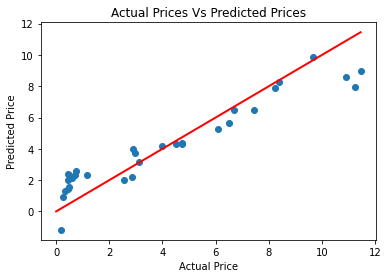

In [63]:
plt.scatter(label_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
max_value = max([*label_test, *test_data_prediction])

plt.plot([0,max_value],[0,max_value], 'red', linewidth=2)

plt.title("Actual Prices Vs Predicted Prices")
plt.show()